In [820]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [308]:
#dataset 1: world real gdp growth, gdp per capita, population growth
import pandas as pd 
file_1='/Users/home/Desktop/Ironhack/Group Assignment/machine_learning/macro_machine_learning_model.xlsx'
sheets_to_load=["world_real_gdp_growth","gdp_per_capita","population_growth"]
macro=pd.read_excel(file_1,sheet_name=sheets_to_load)
macro

{'world_real_gdp_growth':                                                Country      1990      1991  \
 0                      World (from straight aggregate)       NaN       NaN   
 1                                                World  2.757699  1.144446   
 2                                                 OECD  3.056866  1.321766   
 3                                             Non-OECD  1.532640  0.445914   
 4                                   Advanced Economies  2.971156  1.420773   
 ..                                                 ...       ...       ...   
 240                                           Ethiopia  1.284052 -7.217895   
 241                                  Fiscal Year Notes       NaN       NaN   
 242  Aggregates include only countries with availab...       NaN       NaN   
 243  Aggregates list for regional definitions and e...       NaN       NaN   
 244            Source: S&P Global Market Intelligence.       NaN       NaN   
 
          1992       1993

In [309]:
#investment share
file_2='/Users/home/Desktop/Ironhack/Group Assignment/machine_learning/investment_share_gdp.xlsx'
investment_share=pd.read_excel(file_2)
investment_share

Geography  \
0                             Zambia   
1                 World excluding US   
2              World Excluding China   
3                              World   
4                     Western Europe   
..                               ...   
183                          Algeria   
184                          Albania   
185                           Africa   
186  Advanced economies excluding US   
187               Advanced economies   

                                             Concept        Unit  \
0    Nominal share of GDP: Gross Domestic Investment  Percentage   
1    Nominal share of GDP: Gross Domestic Investment  Percentage   
2    Nominal share of GDP: Gross Domestic Investment  Percentage   
3    Nominal share of GDP: Gross Domestic Investment  Percentage   
4    Nominal share of GDP: Gross Domestic Investment  Percentage   
..                                               ...         ...   
183  Nominal share of GDP: Gross Domestic Investment  Percentage   
184  Nominal share of GDP: Gross Domestic Investment  Percentage   
185  Nominal share of GDP: Gross Domestic Investment  Percentage   
186  Nominal share of GDP: Gross Domestic Investment  Percentage   
187  Nominal share of GDP: Gross Domestic Investment  Percentage   

     1990-01-01 00:00:00  1991-01-01 00:00:00  1992-01-01 00:00:00  \
0              11.530553             9.240469             9.974624   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
183            28.589421            31.841327            30.757489   
184            25.313603             7.338759             5.199992   
185                  NaN        342179.427217        155812.425459   
186                  NaN                  NaN                  NaN   
187                  NaN                  NaN                  NaN   

     1993-01-01 00:00:00  1994-01-01 00:00:00  1995-01-01 00:00:00  \
0              12.617448            11.055984            21.310175   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                    NaN                  NaN            21.997629   
..                   ...                  ...                  ...   
183            29.090908            30.080143            30.908556   
184            13.200000            17.900000            21.000000   
185         22734.177690          1347.343559            55.609091   
186                  NaN                  NaN            25.674841   
187                  NaN                  NaN            24.341309   

     1996-01-01 00:00:00  ...  2031-01-01 00:00:00  2032-01-01 00:00:00  \
0              17.119263  ...            47.455629            47.410979   
1                    NaN  ...            28.558869            28.478387   
2                    NaN  ...            23.165307            23.150620   
3                    NaN  ...            26.384007            26.307000   
4              21.366642  ...            22.480651            22.528913   
..                   ...  ...                  ...                  ...   
183            25.678414  ...            35.232004            33.382702   
184            14.093793  ...            23.617524            23.369475   
185            25.505352  ...            21.269214            20.951975   
186            25.372855  ...            23.514654            23.539764   
187            24.205344  ...            21.781605            21.716996   

     2033-01-01 00:00:00  2034-01-01 00:00:00  2035-01-01 00:00:00  \
0              47.361270            47.313442            46.846289   
1     

In [310]:
#education_actual
file_3='/Users/home/Desktop/Ironhack/Group Assignment/machine_learning/schooling_1950_2010.xls'
education_actual=pd.read_excel(file_3)
education_actual

Country    Year  Average Year of Schooling
0     Australia  1950.0                       8.04
1           NaN  1955.0                       8.27
2           NaN  1960.0                       8.53
3           NaN  1965.0                       8.93
4           NaN  1970.0                       9.70
...         ...     ...                        ...
2473        NaN  1990.0                       5.73
2474        NaN  1995.0                       6.70
2475        NaN  2000.0                       7.00
2476        NaN  2005.0                       7.47
2477        NaN  2010.0                       7.61

[2478 rows x 3 columns]

In [311]:
#education_forecast
file_4='/Users/home/Desktop/Ironhack/Group Assignment/machine_learning/schooling_2015_2040.xls'
education_forecast=pd.read_excel(file_4)
education_forecast

Country    Year  Average Years of Schooling
0     Australia  2015.0                       12.92
1           NaN  2020.0                       12.93
2           NaN  2025.0                       12.89
3           NaN  2030.0                       12.85
4           NaN  2035.0                       12.81
...         ...     ...                         ...
1451        NaN  2020.0                        8.32
1452        NaN  2025.0                        8.55
1453        NaN  2030.0                        8.82
1454        NaN  2035.0                        9.08
1455        NaN  2040.0                        9.36

[1456 rows x 3 columns]

In [671]:
def reshape_sheet(macro, value_name):
    macro = macro.rename(columns={macro.columns[0]: "Country"})  # Corrected here
    df_long = macro.melt(id_vars='Country', var_name='Year', value_name=value_name)
    df_long['Year'] = df_long['Year'].astype(int)
    return df_long



In [691]:
gdp_df = reshape_sheet(macro['world_real_gdp_growth'], 'GDPR')

gdp_pc_df = reshape_sheet(macro['gdp_per_capita'], 'GDP_per_capita')

pop_df = reshape_sheet(macro['population_growth'], 'Population_growth')


# Merge on Country and Year
macro_df = gdp_df.merge(gdp_pc_df, on=['Country', 'Year'], how='inner') \
                  .merge(pop_df, on=['Country', 'Year'], how='inner')

macro_df['Country'] = macro_df['Country'].replace('China (mainland)', 'China')
macro_df[macro_df['Country'] == 'China']

macro_df['Country'].unique()


array(['World', 'OECD', 'Non-OECD', 'Advanced Economies',
       'Emerging Markets', 'Developing Economies', 'United States',
       'Canada', 'Mexico', 'USA, Canada, and Mexico (USMCA)',
       'USA and Canada', 'Andorra', 'Austria', 'Belgium', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Italy', 'Liechtenstein', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Western Europe', 'Armenia',
       'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan', 'Kyrgyzstan',
       'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine',
       'Uzbekistan', 'Eastern Europe and Central Asia (EECA)', 'Albania',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Estonia', 'Hungary', 'Kosovo', 'Latvia', 'Lithuania',
       'Macedonia, North', 'Montenegro', 'Poland', 'Romania', 'Serbia',
       'Slovakia', 'Slovenia', 'Turkey',
       'Central Eu

In [314]:
investment_share = investment_share.drop(columns=['Concept', 'Unit'])
investment_share=investment_share.rename(columns={'Geography':'Country'})

In [315]:
investment_long = investment_share.melt(
    id_vars='Country',
    var_name='Year',
    value_name='Investment_rate'
)


In [316]:
investment_share=investment_share.melt(
    id_vars='Country',
    var_name='Year',
    value_name='Investment_rate'
)

In [317]:
investment_share['Year']=pd.to_datetime(investment_share['Year'])

In [318]:
investment_share['Year'] = investment_share['Year'].dt.year

In [655]:
investment_share['Country'] = investment_share['Country'].replace('Greater China', 'China')
investment_share[investment_share['Country']=='China']

Country  Year  Investment_rate
114    China  1990        31.289202
302    China  1991        32.078762
490    China  1992        34.882275
678    China  1993        37.909456
866    China  1994        35.726384
1054   China  1995        35.831107
1242   China  1996        34.317047
1430   China  1997        33.636979
1618   China  1998        32.879971
1806   China  1999        31.768110
1994   China  2000        31.802893
2182   China  2001        32.284684
2370   China  2002        32.625992
2558   China  2003        35.560130
2746   China  2004        38.085349
2934   China  2005        36.936947
3122   China  2006        36.973293
3310   China  2007        37.735960
3498   China  2008        39.734424
3686   China  2009        42.392487
3874   China  2010        44.003034
4062   China  2011        44.310238
4250   China  2012        44.029166
4438   China  2013        44.222392
4626   China  2014        43.703809
4814   China  2015        41.284154
5002   China  2016        40.726185
5190   China  2017        41.106323
5378   China  2018        41.968210
5566   China  2019        41.357670
5754   China  2020        41.286360
5942   China  2021        41.573481
6130   China  2022        41.291346
6318   China  2023        39.994438
6506   China  2024        42.249433
6694   China  2025        42.703685
6882   China  2026        42.646115
7070   China  2027        42.948360
7258   China  2028        42.343923
7446   China  2029        41.866480
7634   China  2030        41.056270
7822   China  2031        40.339291
8010   China  2032        39.802516
8198   China  2033        39.226874
8386   China  2034        38.745774
8574   China  2035        38.281701
8762   China  2036        37.841580
8950   China  2037        37.432809
9138   China  2038        37.030342
9326   China  2039        36.628642
9514   China  2040        36.292250

In [320]:
education_actual['Country'] = education_actual['Country'].fillna(method='ffill')
education_forecast['Country'] = education_forecast['Country'].fillna(method='ffill')
education_forecast

/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_91496/935150850.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  education_actual['Country'] = education_actual['Country'].fillna(method='ffill')
/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_91496/935150850.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  education_forecast['Country'] = education_forecast['Country'].fillna(method='ffill')


Country    Year  Average Years of Schooling
0     Australia  2015.0                       12.92
1     Australia  2020.0                       12.93
2     Australia  2025.0                       12.89
3     Australia  2030.0                       12.85
4     Australia  2035.0                       12.81
...         ...     ...                         ...
1451   Zimbabwe  2020.0                        8.32
1452   Zimbabwe  2025.0                        8.55
1453   Zimbabwe  2030.0                        8.82
1454   Zimbabwe  2035.0                        9.08
1455   Zimbabwe  2040.0                        9.36

[1456 rows x 3 columns]

In [321]:
education_actual.dropna()
education_forecast.dropna()


Country    Year  Average Years of Schooling
0     Australia  2015.0                       12.92
1     Australia  2020.0                       12.93
2     Australia  2025.0                       12.89
3     Australia  2030.0                       12.85
4     Australia  2035.0                       12.81
...         ...     ...                         ...
1451   Zimbabwe  2020.0                        8.32
1452   Zimbabwe  2025.0                        8.55
1453   Zimbabwe  2030.0                        8.82
1454   Zimbabwe  2035.0                        9.08
1455   Zimbabwe  2040.0                        9.36

[876 rows x 3 columns]

In [322]:
education_actual['Year'] = education_actual['Year'].astype('Int64')  # ✅ handles NaNs gracefully
education_forecast['Year'] = education_forecast['Year'].astype('Int64')  # ✅ handles NaNs gracefully


In [323]:
education_actual = education_actual.rename(columns={'Average Year of Schooling': 'Avg_years_schooling'})
education_forecast = education_forecast.rename(columns={'Average Years of Schooling': 'Avg_years_schooling'})


In [324]:
education_all = pd.concat([education_actual, education_forecast], ignore_index=True)
education_all

Country  Year  Avg_years_schooling
0     Australia  1950                 8.04
1     Australia  1955                 8.27
2     Australia  1960                 8.53
3     Australia  1965                 8.93
4     Australia  1970                 9.70
...         ...   ...                  ...
3929   Zimbabwe  2020                 8.32
3930   Zimbabwe  2025                 8.55
3931   Zimbabwe  2030                 8.82
3932   Zimbabwe  2035                 9.08
3933   Zimbabwe  2040                 9.36

[3934 rows x 3 columns]

In [639]:
education_all[education_all['Country']=='China'].sort_values(by='Year')

Country  Year  Avg_years_schooling
442    China  1950                 1.61
443    China  1955                 1.96
444    China  1960                 2.51
445    China  1965                 3.11
446    China  1970                 3.82
447    China  1975                 4.48
448    China  1980                 5.31
449    China  1985                 5.72
450    China  1990                 6.04
451    China  1995                 6.79
452    China  2000                 7.38
453    China  2005                 7.69
454    China  2010                 7.95
2758   China  2015                 8.51
2759   China  2020                 8.99
2760   China  2025                 9.38
2761   China  2030                 9.88
2762   China  2035                10.38
2763   China  2040                10.92
455    China  <NA>                  NaN
456    China  <NA>                  NaN
457    China  <NA>                  NaN
458    China  <NA>                  NaN
2764   China  <NA>                  NaN
2765   China  <NA>                  NaN
2766   China  <NA>                  NaN
2767   China  <NA>                  NaN

In [326]:
education_all.describe()

Year  Avg_years_schooling
count     2774.0          2774.000000
mean      1995.0             6.845274
std    27.391065             3.607883
min       1950.0             0.020000
25%       1970.0             3.890000
50%       1995.0             7.040000
75%       2020.0             9.827500
max       2040.0            15.480000

In [327]:
education_all.isna().sum()

Country                   0
Year                   1160
Avg_years_schooling    1160
dtype: int64

In [641]:
education_all_cleaned = education_all.dropna()
education_all_cleaned[education_all_cleaned['Country']=='China'].sort_values(by='Year')

Country  Year  Avg_years_schooling
442    China  1950                 1.61
443    China  1955                 1.96
444    China  1960                 2.51
445    China  1965                 3.11
446    China  1970                 3.82
447    China  1975                 4.48
448    China  1980                 5.31
449    China  1985                 5.72
450    China  1990                 6.04
451    China  1995                 6.79
452    China  2000                 7.38
453    China  2005                 7.69
454    China  2010                 7.95
2758   China  2015                 8.51
2759   China  2020                 8.99
2760   China  2025                 9.38
2761   China  2030                 9.88
2762   China  2035                10.38
2763   China  2040                10.92

In [329]:
education_all_cleaned.isna().sum()

Country                0
Year                   0
Avg_years_schooling    0
dtype: int64

In [330]:
macro

{'world_real_gdp_growth':                                                Country      1990      1991  \
 0                      World (from straight aggregate)       NaN       NaN   
 1                                                World  2.757699  1.144446   
 2                                                 OECD  3.056866  1.321766   
 3                                             Non-OECD  1.532640  0.445914   
 4                                   Advanced Economies  2.971156  1.420773   
 ..                                                 ...       ...       ...   
 240                                           Ethiopia  1.284052 -7.217895   
 241                                  Fiscal Year Notes       NaN       NaN   
 242  Aggregates include only countries with availab...       NaN       NaN   
 243  Aggregates list for regional definitions and e...       NaN       NaN   
 244            Source: S&P Global Market Intelligence.       NaN       NaN   
 
          1992       1993

In [693]:
macro_df.isna().sum()

Country                0
Year                   0
GDPR                  87
GDP_per_capita       249
Population_growth      0
dtype: int64

In [332]:
macro_df.describe()

Year          GDPR  GDP_per_capita  Population_growth
count  15312.000000  15225.000000    15063.000000       15312.000000
mean    2022.500000      3.008852    27052.161663           1.025088
std       19.050994      5.067098    42854.298051           1.410314
min     1990.000000    -69.142862        0.417499         -24.020000
25%     2006.000000      1.595714     2603.397411           0.140000
50%     2022.500000      2.811332     9728.757029           0.880000
75%     2039.000000      4.500000    32777.802199           1.810000
max     2055.000000    122.718334   416171.493163          24.230000

In [695]:
macro_df_clean=macro_df.dropna()
macro_df_clean['Country'].unique()

array(['United States', 'Canada', 'Mexico',
       'USA, Canada, and Mexico (USMCA)', 'USA and Canada', 'Andorra',
       'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Italy', 'Liechtenstein', 'Malta',
       'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Kyrgyzstan', 'Moldova', 'Russia',
       'Tajikistan', 'Uzbekistan', 'Albania', 'Bulgaria', 'Hungary',
       'Latvia', 'Poland', 'Romania', 'Slovakia', 'Turkey', 'Afghanistan',
       'American Samoa', 'Australia', 'Bhutan', 'Brunei', 'Cambodia',
       'China', 'Fiji', 'Guam', 'Hong Kong SAR', 'Indonesia', 'Japan',
       'Kiribati', 'Laos', 'Macao SAR', 'Malaysia', 'Maldives',
       'Mongolia', 'New Zealand', 'Papua New Guinea', 'Philippines',
       'Samoa', 'Singapore', 'Solomon Islands', 'South Korea',
       'Sri Lanka', 'Taiwan', 'Thailand', 'Tuvalu', 'Vanuatu', 'Vietnam',
       'Antigua and Barbuda', 'Argentina', 'Ar

In [683]:
macro_df_clean.isna().sum()

Country              0
Year                 0
GDPR                 0
GDP_per_capita       0
Population_growth    0
dtype: int64

In [685]:
macro_df_clean[macro_df_clean['Country']=='China'].sort_values(by='Year')

Empty DataFrame
Columns: [Country, Year, GDPR, GDP_per_capita, Population_growth]
Index: []

In [647]:
investment_share.isna().sum()

Country              0
Year                 0
Investment_rate    533
dtype: int64

In [337]:
investment_share_clean=investment_share.dropna()


In [338]:
df= macro_df_clean.merge(education_all_cleaned, on=['Country', 'Year'], how='left')
df

Country  Year      GDPR  GDP_per_capita  Population_growth  \
0      United States  1990  1.885958    23795.862418               1.17   
1             Canada  1990  0.202948    21450.173119               1.55   
2             Mexico  1990  5.256268     4150.792823               1.94   
3             Mexico  1990  5.256268     4150.792823               1.94   
4             Mexico  1990  5.256268     4150.792823               1.94   
...              ...   ...       ...             ...                ...   
15026          India  2055  4.546874    27481.001686               0.21   
15027       Pakistan  2055  3.955871     7095.512409               1.10   
15028          Egypt  2055  3.603130    25948.082647               0.87   
15029           Iran  2055  1.793408    36541.402020               0.03   
15030       Ethiopia  2055  7.588180     7728.226820               1.55   

       Avg_years_schooling  
0                      NaN  
1                    10.33  
2                     6.47  
3                     6.47  
4                     6.47  
...                    ...  
15026                  NaN  
15027                  NaN  
15028                  NaN  
15029                  NaN  
15030                  NaN  

[15031 rows x 6 columns]

In [339]:
df=df.merge(investment_share_clean,on=['Country','Year'],how='left')
df

Country  Year      GDPR  GDP_per_capita  Population_growth  \
0      United States  1990  1.885958    23795.862418               1.17   
1             Canada  1990  0.202948    21450.173119               1.55   
2             Mexico  1990  5.256268     4150.792823               1.94   
3             Mexico  1990  5.256268     4150.792823               1.94   
4             Mexico  1990  5.256268     4150.792823               1.94   
...              ...   ...       ...             ...                ...   
15026          India  2055  4.546874    27481.001686               0.21   
15027       Pakistan  2055  3.955871     7095.512409               1.10   
15028          Egypt  2055  3.603130    25948.082647               0.87   
15029           Iran  2055  1.793408    36541.402020               0.03   
15030       Ethiopia  2055  7.588180     7728.226820               1.55   

       Avg_years_schooling  Investment_rate  
0                      NaN        21.529220  
1                    10.33        21.304211  
2                     6.47              NaN  
3                     6.47              NaN  
4                     6.47              NaN  
...                    ...              ...  
15026                  NaN              NaN  
15027                  NaN              NaN  
15028                  NaN              NaN  
15029                  NaN              NaN  
15030                  NaN              NaN  

[15031 rows x 7 columns]

In [340]:
df.describe()

Year          GDPR  GDP_per_capita  Population_growth  \
count  15031.000000  15031.000000    15031.000000       15031.000000   
mean    2023.039385      3.038502    27076.969037           1.021629   
std       18.805346      5.031593    42889.430824           1.410719   
min     1990.000000    -69.142862        0.417499         -24.020000   
25%     2007.000000      1.602959     2606.306211           0.130000   
50%     2023.000000      2.815305     9732.046672           0.880000   
75%     2039.000000      4.500000    32773.200147           1.810000   
max     2055.000000    122.718334   416171.493163          24.230000   

       Avg_years_schooling  Investment_rate  
count           1397.00000     7.112000e+03  
mean               8.89355     2.347692e+03  
std                2.83766     1.298348e+05  
min                0.89000    -3.743680e+00  
25%                7.06000     2.020896e+01  
50%                9.34000     2.357389e+01  
75%               11.07000     2.798217e+01  
max               15.48000     1.000336e+07

In [649]:
df[df['Country']=='Greater China'].sort_values(by='Year')

Empty DataFrame
Columns: [Country, Year, GDPR, GDP_per_capita, Population_growth, Avg_years_schooling, Investment_rate, log_GDP_per_capita]
Index: []

In [342]:
df.describe()

Year          GDPR  GDP_per_capita  Population_growth  \
count  15031.000000  15031.000000    15031.000000       15031.000000   
mean    2023.039385      3.038502    27076.969037           1.021629   
std       18.805346      5.031593    42889.430824           1.410719   
min     1990.000000    -69.142862        0.417499         -24.020000   
25%     2007.000000      1.602959     2606.306211           0.130000   
50%     2023.000000      2.815305     9732.046672           0.880000   
75%     2039.000000      4.500000    32773.200147           1.810000   
max     2055.000000    122.718334   416171.493163          24.230000   

       Avg_years_schooling  Investment_rate  
count           1397.00000     7.112000e+03  
mean               8.89355     2.347692e+03  
std                2.83766     1.298348e+05  
min                0.89000    -3.743680e+00  
25%                7.06000     2.020896e+01  
50%                9.34000     2.357389e+01  
75%               11.07000     2.798217e+01  
max               15.48000     1.000336e+07

In [343]:
df_clean=df.dropna()
import numpy as np

df_clean['log_GDP_per_capita'] = np.log(df_clean['GDP_per_capita'])


/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_91496/3964885001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_GDP_per_capita'] = np.log(df_clean['GDP_per_capita'])


In [635]:
df_clean[df_clean['Country']=='China'].sort_values(by='Year')

Empty DataFrame
Columns: [Country, Year, GDPR, GDP_per_capita, Population_growth, Avg_years_schooling, Investment_rate, log_GDP_per_capita]
Index: []

In [345]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 1 to 11549
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1073 non-null   object 
 1   Year                 1073 non-null   int64  
 2   GDPR                 1073 non-null   float64
 3   GDP_per_capita       1073 non-null   float64
 4   Population_growth    1073 non-null   float64
 5   Avg_years_schooling  1073 non-null   float64
 6   Investment_rate      1073 non-null   float64
 7   log_GDP_per_capita   1073 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 75.4+ KB


In [598]:
df_clean['Country'].nunique()

96

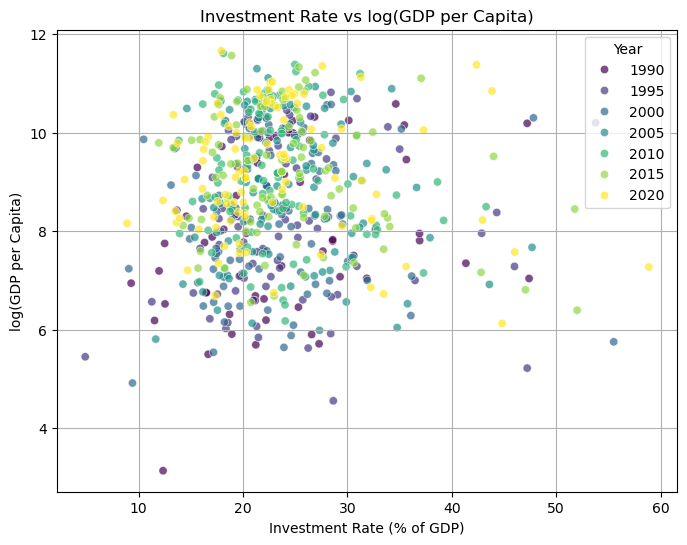

In [376]:
#investment rate & GDP per capita (current data)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df_clean.copy()

df = df[df['Year'] <= 2020]
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Investment_rate', y='log_GDP_per_capita', hue='Year', palette='viridis', alpha=0.7)
plt.title('Investment Rate vs log(GDP per Capita)')
plt.xlabel('Investment Rate (% of GDP)')
plt.ylabel('log(GDP per Capita)')
plt.grid(True)
plt.show()


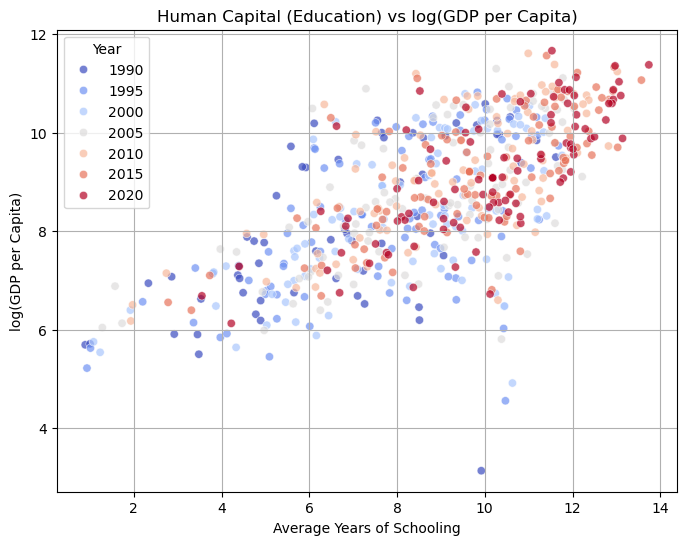

In [378]:
#education & GDP per capita (current data)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Avg_years_schooling', y='log_GDP_per_capita', hue='Year', palette='coolwarm', alpha=0.7)
plt.title('Human Capital (Education) vs log(GDP per Capita)')
plt.xlabel('Average Years of Schooling')
plt.ylabel('log(GDP per Capita)')
plt.grid(True)
plt.show()


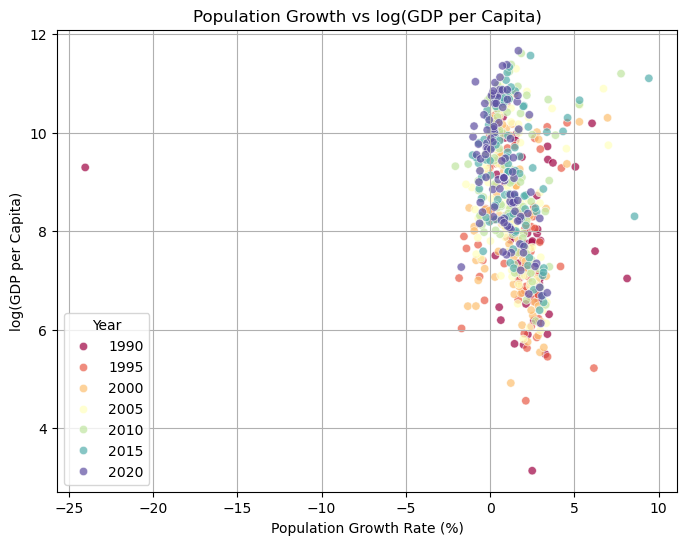

In [380]:
#population growth & GDP per capita (current data)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Population_growth', y='log_GDP_per_capita', hue='Year', palette='Spectral', alpha=0.7)
plt.title('Population Growth vs log(GDP per Capita)')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('log(GDP per Capita)')
plt.grid(True)
plt.show()


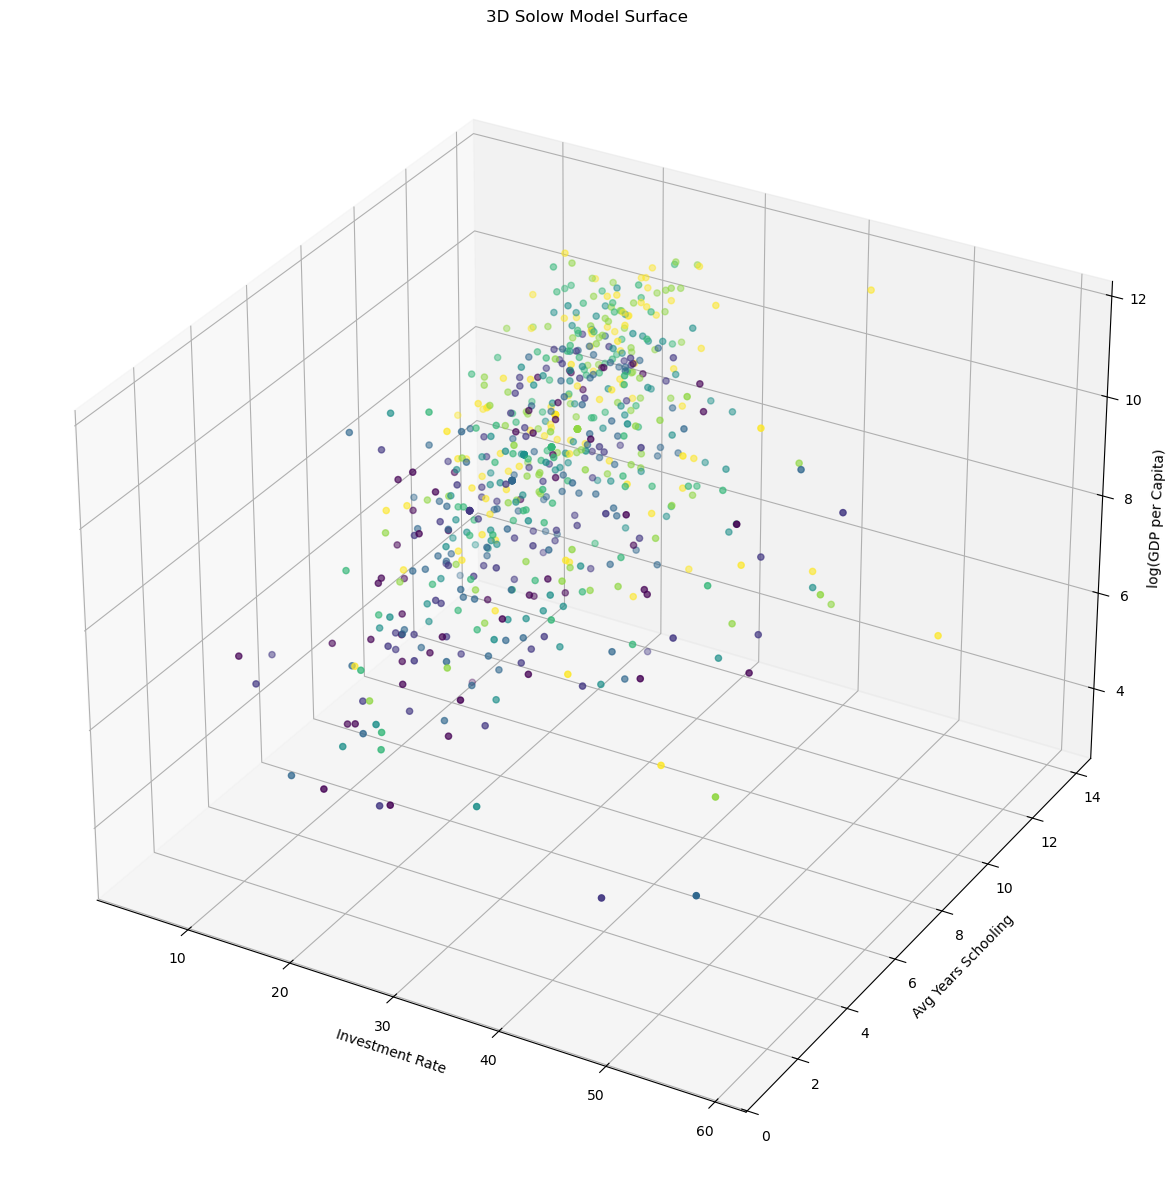

In [382]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Investment_rate'], df['Avg_years_schooling'], df['log_GDP_per_capita'], c=df['Year'], cmap='viridis')
ax.set_xlabel('Investment Rate')
ax.set_ylabel('Avg Years Schooling')
ax.set_zlabel('log(GDP per Capita)')
ax.set_title('3D Solow Model Surface')
plt.show()


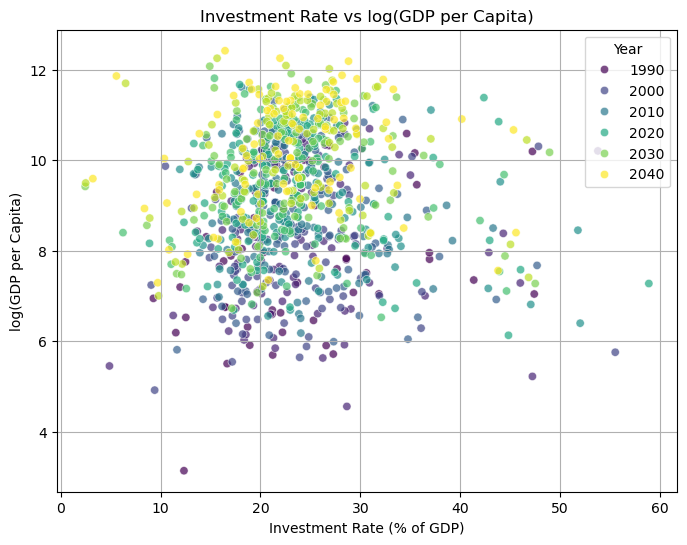

In [384]:
#investment rate & GDP per capita (future data)
df_1 = df_clean.copy()
df_1['log_GDP_pc'] = np.log(df['GDP_per_capita'])

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_1, x='Investment_rate', y='log_GDP_per_capita', hue='Year', palette='viridis', alpha=0.7)
plt.title('Investment Rate vs log(GDP per Capita)')
plt.xlabel('Investment Rate (% of GDP)')
plt.ylabel('log(GDP per Capita)')
plt.grid(True)
plt.show()

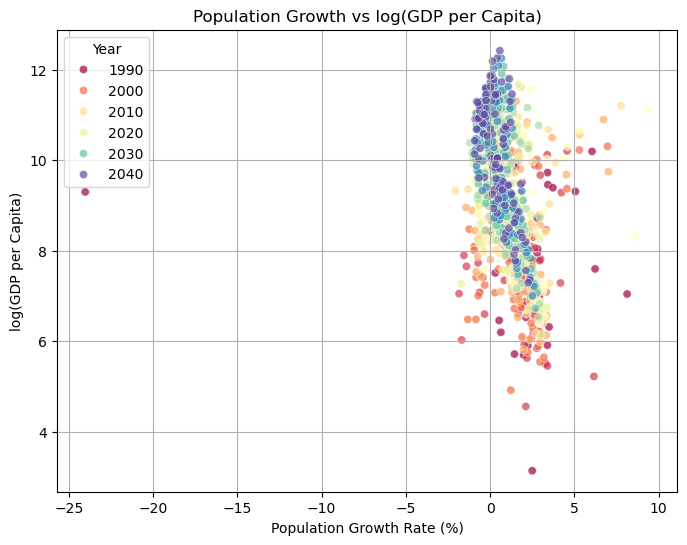

In [386]:
#population growth & GDP per capita (current data)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_1, x='Population_growth', y='log_GDP_per_capita', hue='Year', palette='Spectral', alpha=0.7)
plt.title('Population Growth vs log(GDP per Capita)')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('log(GDP per Capita)')
plt.grid(True)
plt.show()

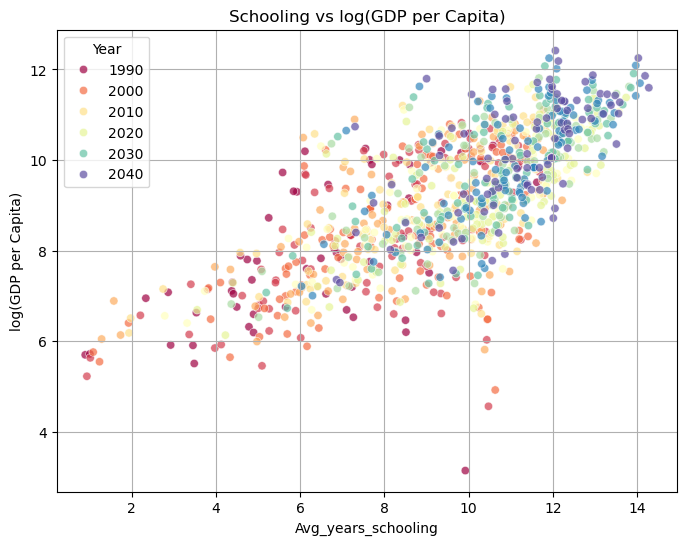

In [993]:
#population growth & GDP per capita (current data)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_1, x='Avg_years_schooling', y='log_GDP_per_capita', hue='Year', palette='Spectral', alpha=0.7)
plt.title('Schooling vs log(GDP per Capita)')
plt.xlabel('Avg_years_schooling')
plt.ylabel('log(GDP per Capita)')
plt.grid(True)
plt.show()


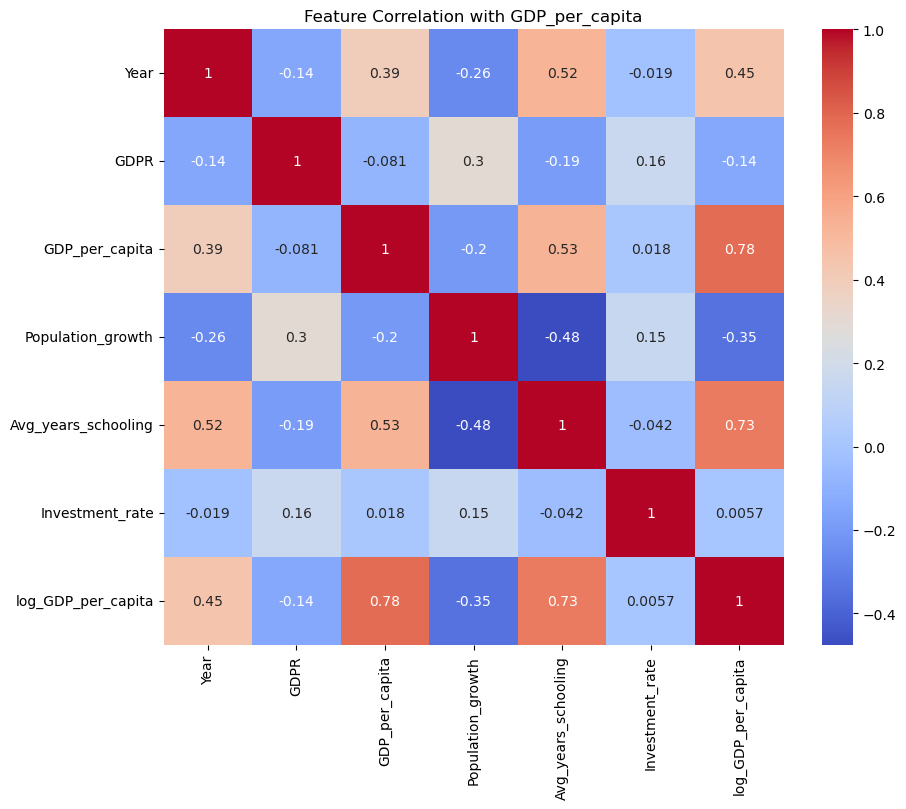

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with GDP_per_capita')
plt.show()


In [857]:
#step 1: Train test split
df_actual=df_clean[df_clean['Year']<2024]
df_actual

Country  Year      GDPR  GDP_per_capita  Population_growth  \
1       Canada  1990  0.202948    21450.173119               1.55   
9      Austria  1990  4.197162    21993.030581               0.78   
11     Denmark  1990  0.920112    26885.452372               0.16   
12     Finland  1990 -0.525578    28366.824081               0.44   
13      France  1990  2.792610    22078.277629               0.54   
...        ...   ...       ...             ...                ...   
6901    Zambia  2020 -2.785055      954.971308               2.95   
6906     India  2020 -5.935409     1851.681639               0.98   
6907  Pakistan  2020 -0.494141     1350.923557               1.82   
6908     Egypt  2020  1.431745     3673.142373               1.64   
6909      Iran  2020  1.190015     1957.769961               0.77   

      Avg_years_schooling  Investment_rate  log_GDP_per_capita  
1                   10.33        21.304211            9.973488  
9                    8.36        24.773007            9.998481  
11                   9.35        20.608271           10.199341  
12                   7.55        30.137197           10.252976  
13                   7.65        24.365919           10.002349  
...                   ...              ...                 ...  
6901                 8.37        32.245049            6.861681  
6906                 7.80        27.452954            7.523849  
6907                 6.41        14.705540            7.208544  
6908                 8.01        18.796936            8.208803  
6909                 9.80        46.038080            7.579561  

[668 rows x 8 columns]

In [931]:
feature_1 = df_actual.drop(['Country', 'Year', 'GDP_per_capita','log_GDP_per_capita','GDPR'], axis=1)
target = df_actual['log_GDP_per_capita']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature_1, target, test_size=0.20, random_state=0)

In [933]:
feature_1

Population_growth  Avg_years_schooling  Investment_rate
1                  1.55                10.33        21.304211
9                  0.78                 8.36        24.773007
11                 0.16                 9.35        20.608271
12                 0.44                 7.55        30.137197
13                 0.54                 7.65        24.365919
...                 ...                  ...              ...
6901               2.95                 8.37        32.245049
6906               0.98                 7.80        27.452954
6907               1.82                 6.41        14.705540
6908               1.64                 8.01        18.796936
6909               0.77                 9.80        46.038080

[668 rows x 3 columns]

In [919]:
X_train_1 = feature_1.loc[X_train.index]
X_test_1 = feature_1.loc[X_test.index]
#take the same rows in feature_1 that was used in X_train and X_test

In [935]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_1)

MinMaxScaler()

In [957]:
X_train_scaled_1 = scaler.transform(X_train)

X_test_scaled_1 = scaler.transform(X_test)

In [959]:
X_test_scal_1 = pd.DataFrame(X_test_scaled_1)
X_train_scal_1 = pd.DataFrame(X_train_scaled_1)
X_train_scal_1

0         1         2
0    0.794258  0.430133  0.577755
1    0.749103  0.746292  0.383606
2    0.718900  0.500390  0.254052
3    0.796053  0.415301  0.257936
4    0.801435  0.812646  0.385570
..        ...       ...       ...
529  0.728469  0.729899  0.368028
530  0.761663  0.613583  0.341213
531  0.719199  0.801717  0.424650
532  0.742823  0.722092  0.284697
533  0.813098  0.544106  0.702283

[534 rows x 3 columns]

In [961]:
lin_reg = LinearRegression() 
lin_reg.fit(X_train_scal_1, y_train)

LinearRegression()

In [965]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_reg_2 = lin_reg.predict(X_test_scal_1)

mae = mean_absolute_error(y_test, pred_reg_2)
rmse = mean_squared_error(y_test, pred_reg_2, squared=False)
r2 = lin_reg.score(X_test_scal_1, y_test)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² score:", r2)

MAE: 0.7524421124653919
RMSE: 1.0153108978350776
R² score: 0.511637219637189


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [770]:
lin_reg_coef_1 = {feature : coef for feature, coef in zip(X_train_1.columns, lin_reg_2.coef_)}
lin_reg_coef_1

{'Population_growth': 1.7984857374212444,
 'Avg_years_schooling': 4.915479379963897,
 'Investment_rate': 0.3832120120133195}

In [585]:
df_clean[df_clean['Country']=='India']

Country  Year      GDPR  GDP_per_capita  Population_growth  \
175     India  1990  5.533455      366.954041               2.24   
1170    India  1995  7.574492      373.349624               2.03   
2279    India  2000  5.921049      443.377630               1.90   
3430    India  2005  8.053943      684.926884               1.64   
4586    India  2010  9.521314     1279.817688               1.47   
5746    India  2015  7.509056     1571.767292               1.20   
6906    India  2020 -5.935409     1851.681639               0.98   
8066    India  2025  6.909701     2809.102438               0.89   
9226    India  2030  5.427919     4449.083016               0.77   
10386   India  2035  4.732075     6498.555966               0.64   
11546   India  2040  4.718458     9342.222648               0.49   

       Avg_years_schooling  Investment_rate  log_GDP_per_capita  
175                   3.45        26.581182            5.905237  
1170                  4.12        28.407988            5.922515  
2279                  5.03        24.835757            6.094422  
3430                  5.63        35.759168            6.529312  
4586                  6.24        37.294828            7.154473  
5746                  7.31        30.644062            7.359956  
6906                  7.80        27.452954            7.523849  
8066                  8.38        30.466831            7.940620  
9226                  8.95        30.949477            8.400453  
10386                 9.52        30.243493            8.779335  
11546                10.03        29.965204            9.142299

In [722]:
developed = ["United States", "Australia", "Netherlands", "United Kingdom"]
late_industrializers = ["Japan", "Singapore"]
developing = ["India", "China","Argentina", "Brazil"]

# Create separate DataFrames
df_dev = df_clean[df_clean['Country'].isin(developed)]
df_late = df_clean[df_clean['Country'].isin(late_industrializers)]
df_devp = df_clean[df_clean['Country'].isin(developing)]

In [726]:
df_devp[df_devp['Country']=='China']

Country  Year       GDPR  GDP_per_capita  Population_growth  \
47      China  1990   3.906316      343.547980               1.73   
1037    China  1995  11.020266      605.042177               0.92   
2135    China  2000   8.570948      964.069844               0.75   
3284    China  2005  11.437799     1769.232094               0.61   
4439    China  2010  10.592970     4582.478266               0.67   
5599    China  2015   7.018473     8006.782473               0.59   
6759    China  2020   2.307248    10512.970203               0.18   
7919    China  2025   4.209560    13456.155033              -0.23   
9079    China  2030   4.291803    19021.045711              -0.29   
10239   China  2035   3.780091    26107.506090              -0.40   
11399   China  2040   3.218289    34281.331989              -0.49   

       Avg_years_schooling  Investment_rate  log_GDP_per_capita  
47                    6.04        31.289202            5.839327  
1037                  6.79        35.831107            6.405298  
2135                  7.38        31.802893            6.871164  
3284                  7.69        36.936947            7.478301  
4439                  7.95        44.003034            8.429995  
5599                  8.51        41.284154            8.988044  
6759                  8.99        41.286360            9.260365  
7919                  9.38        42.703685            9.507192  
9079                  9.88        41.056270            9.853301  
10239                10.38        38.281701           10.169978  
11399                10.92        36.292250           10.442356

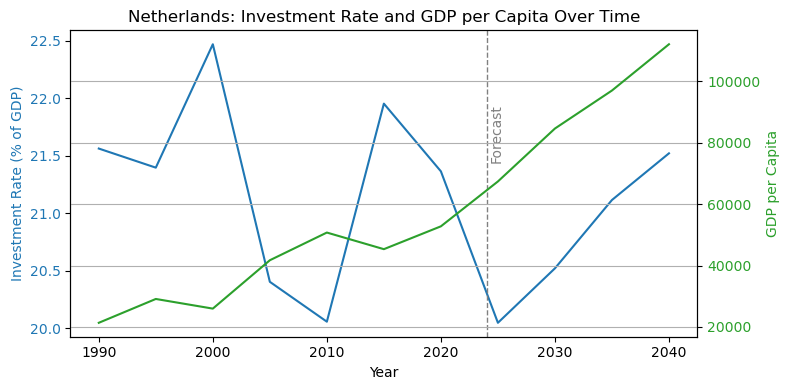

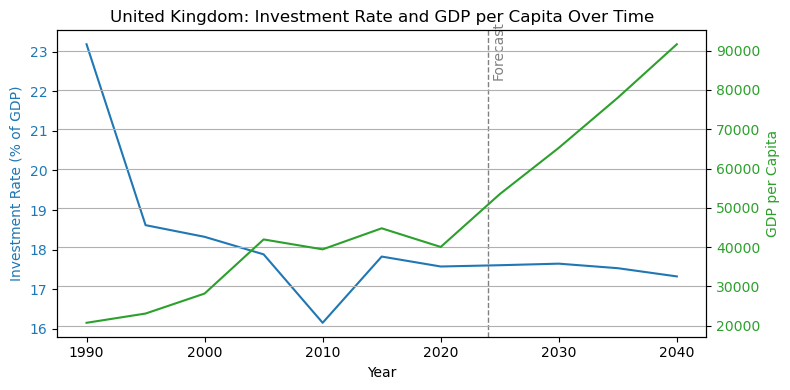

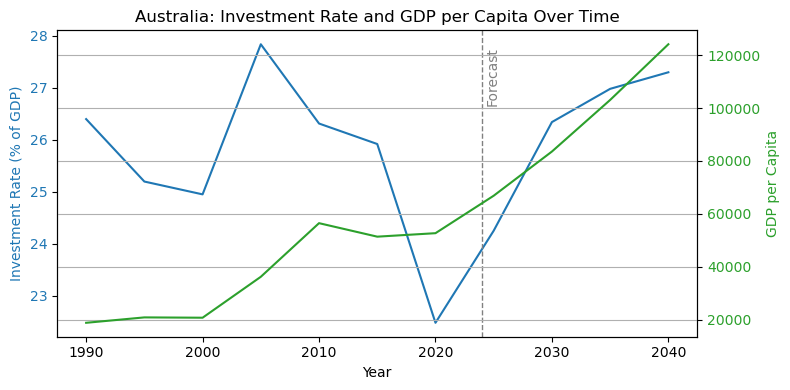

In [545]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_dev['Country'].unique()

# Loop through each country
for country in countries:
    data = df_dev[df_dev['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Investment_rate'], color='tab:blue', label='Investment Rate')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Investment Rate (% of GDP)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(f"{country}: Investment Rate and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()


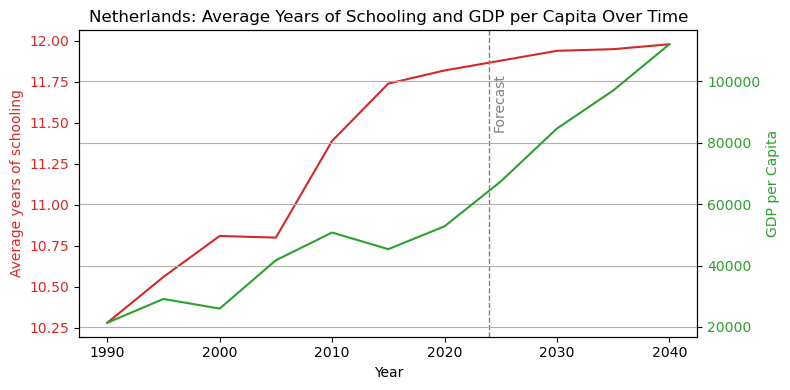

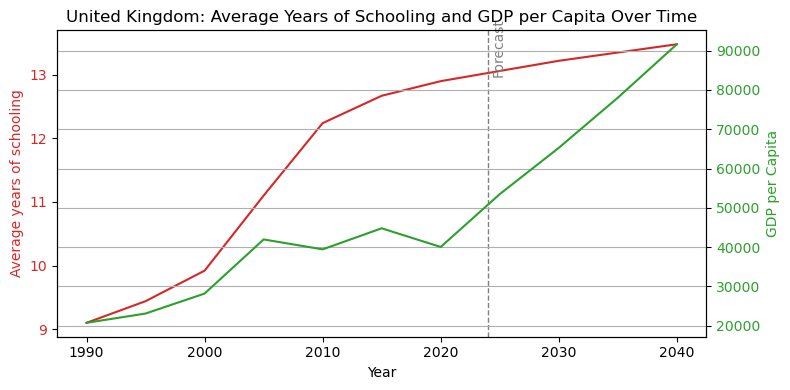

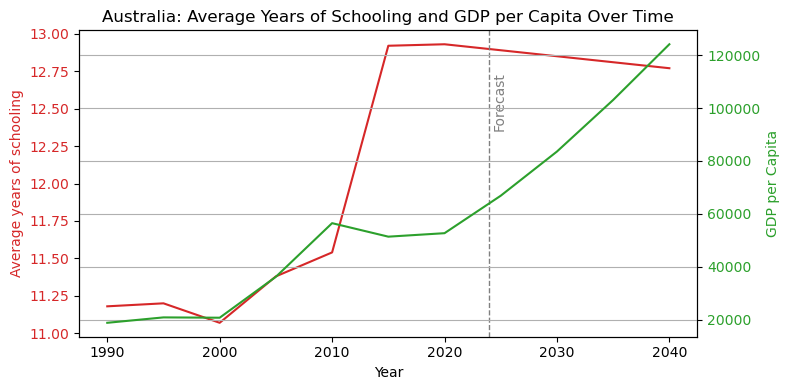

In [567]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_dev['Country'].unique()

# Loop through each country
for country in countries:
    data = df_dev[df_dev['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Avg_years_schooling'], color='tab:red', label='Average years of schooling')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average years of schooling', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_title(f"{country}: Average Years of Schooling and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()

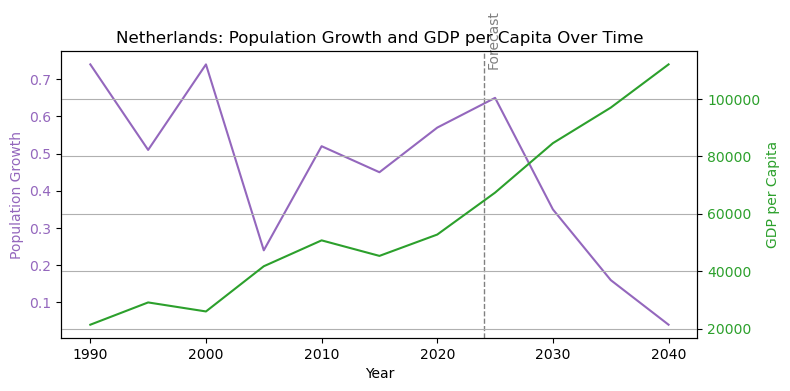

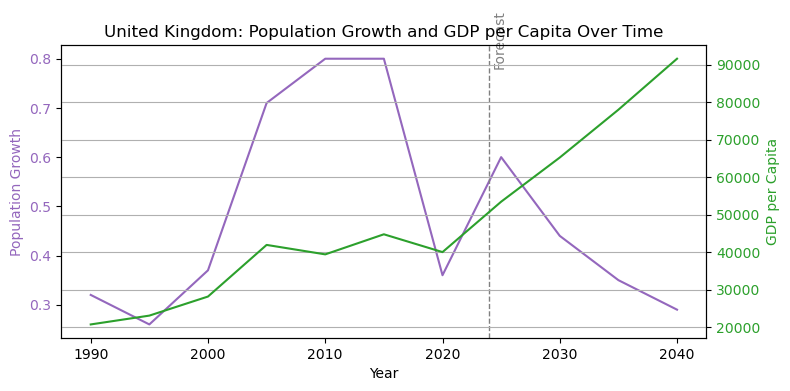

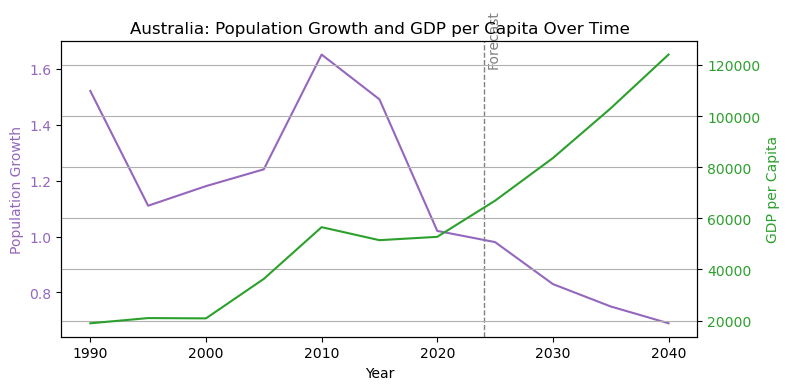

In [573]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_dev['Country'].unique()

# Loop through each country
for country in countries:
    data = df_dev[df_dev['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Population_growth'], color='tab:purple', label='Population Growth')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Population Growth', color='tab:purple')
    ax1.tick_params(axis='y', labelcolor='tab:purple')
    ax1.set_title(f"{country}: Population Growth and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()

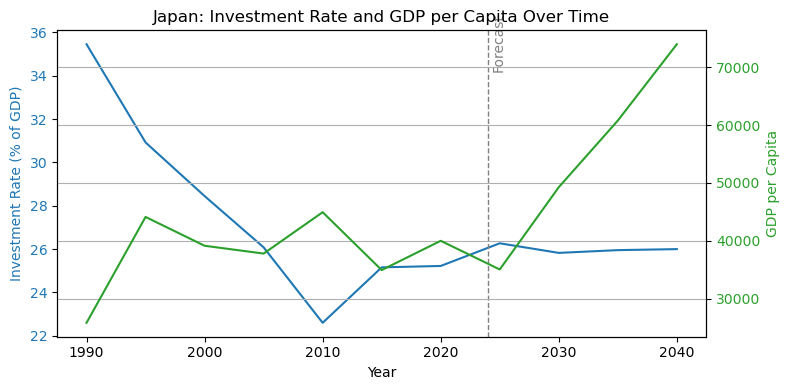

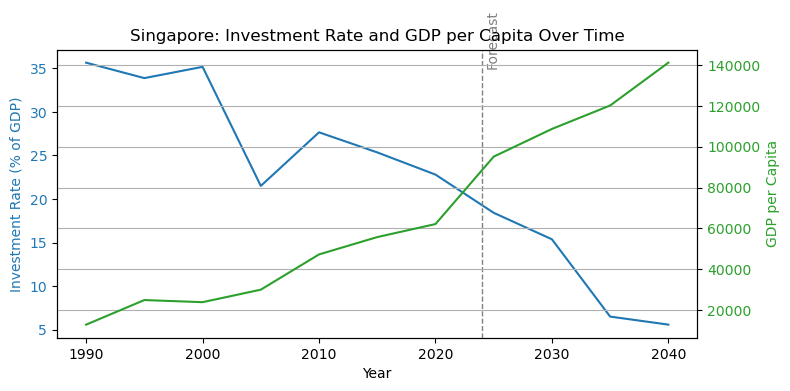

In [569]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_late['Country'].unique()

# Loop through each country
for country in countries:
    data = df_late[df_late['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Investment_rate'], color='tab:blue', label='Investment Rate')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Investment Rate (% of GDP)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(f"{country}: Investment Rate and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()


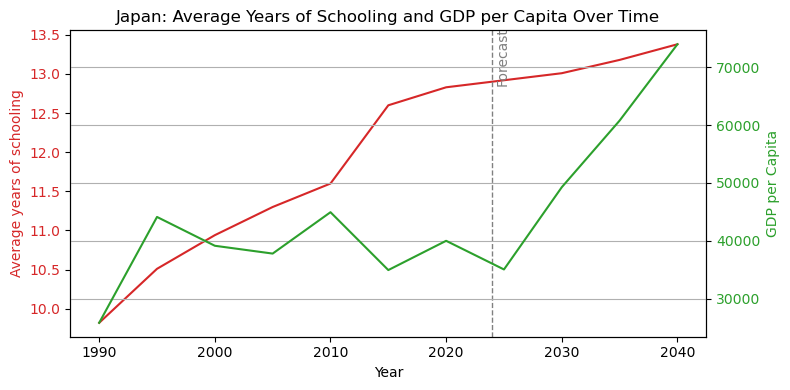

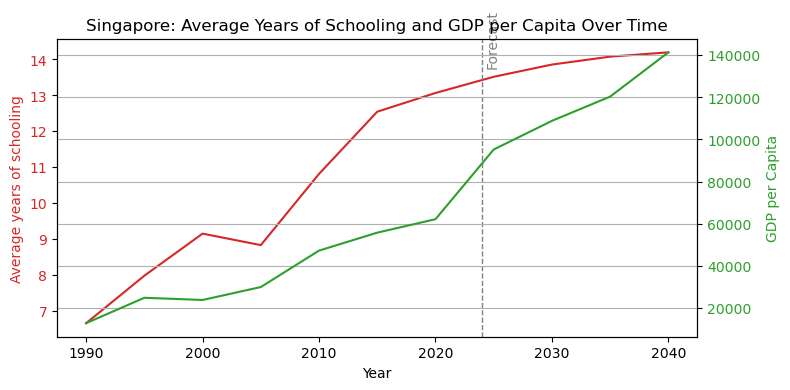

In [575]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_late['Country'].unique()

# Loop through each country
for country in countries:
    data = df_late[df_late['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Avg_years_schooling'], color='tab:red', label='Average years of schooling')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average years of schooling', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_title(f"{country}: Average Years of Schooling and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()

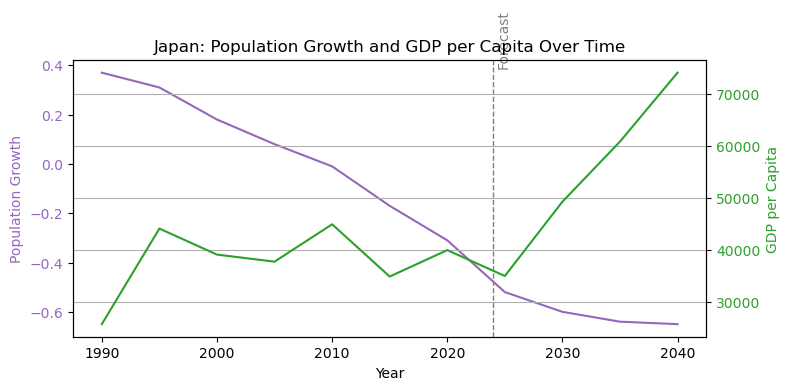

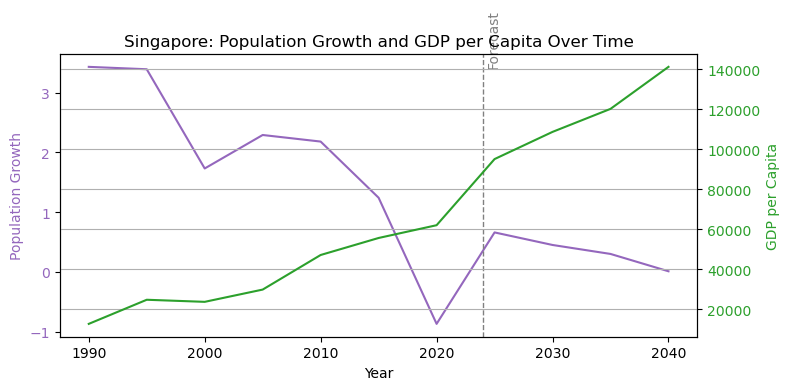

In [577]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_late['Country'].unique()

# Loop through each country
for country in countries:
    data = df_late[df_late['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Population_growth'], color='tab:purple', label='Population Growth')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Population Growth', color='tab:purple')
    ax1.tick_params(axis='y', labelcolor='tab:purple')
    ax1.set_title(f"{country}: Population Growth and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()

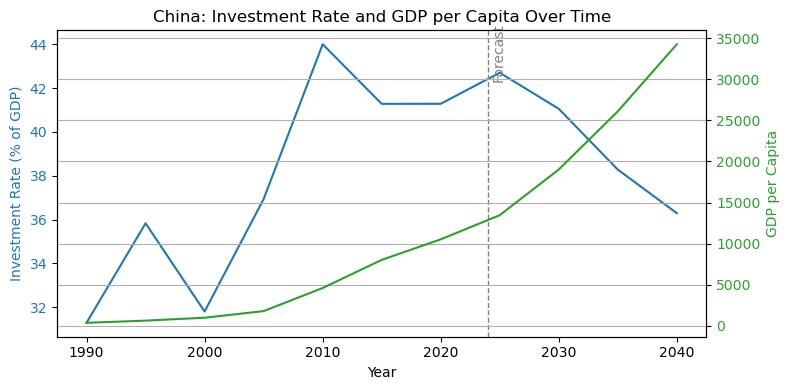

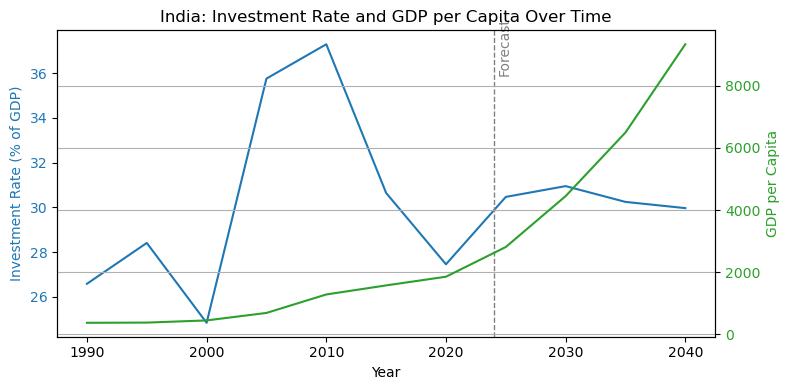

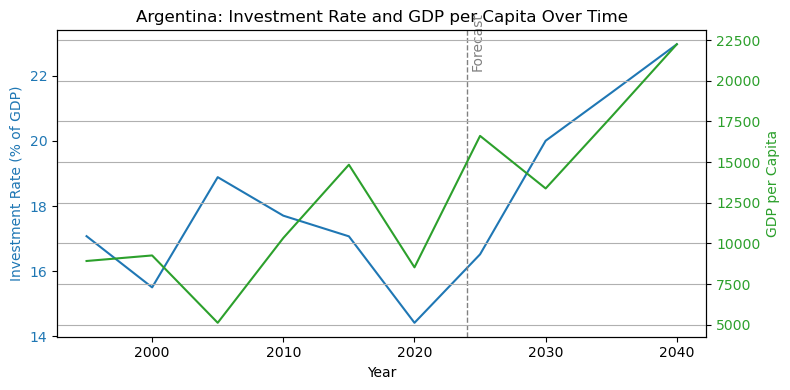

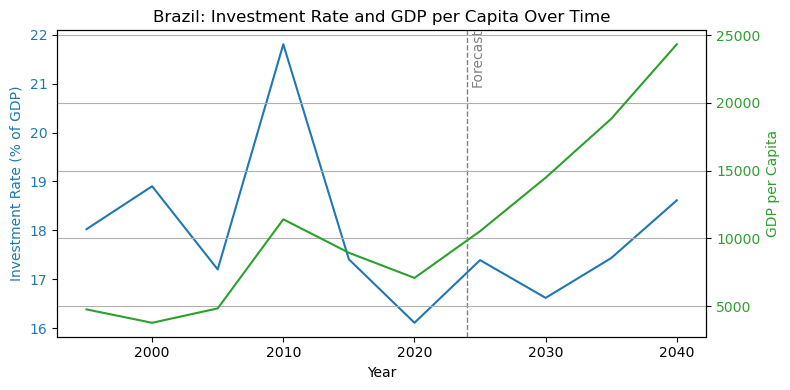

In [728]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_devp['Country'].unique()

# Loop through each country
for country in countries:
    data = df_devp[df_devp['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Investment_rate'], color='tab:blue', label='Investment Rate')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Investment Rate (% of GDP)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(f"{country}: Investment Rate and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()


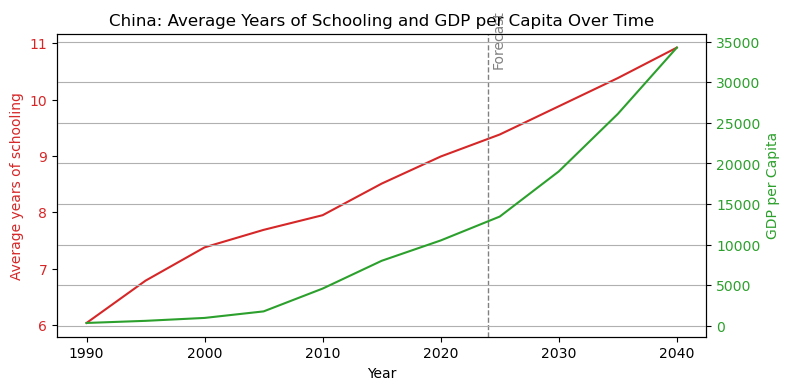

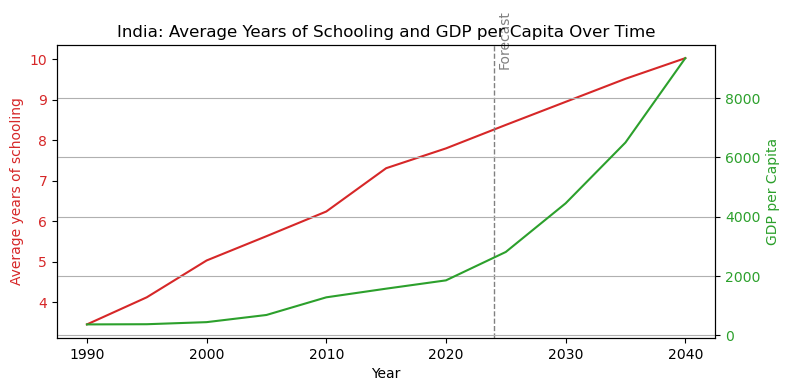

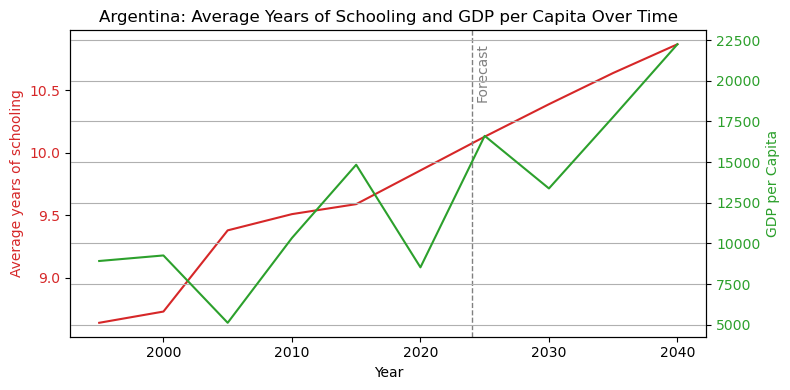

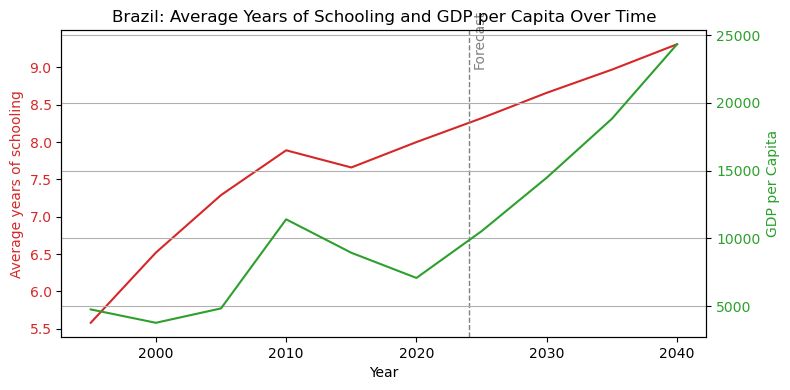

In [730]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_devp['Country'].unique()

# Loop through each country
for country in countries:
    data = df_devp[df_devp['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Avg_years_schooling'], color='tab:red', label='Average years of schooling')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average years of schooling', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_title(f"{country}: Average Years of Schooling and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()

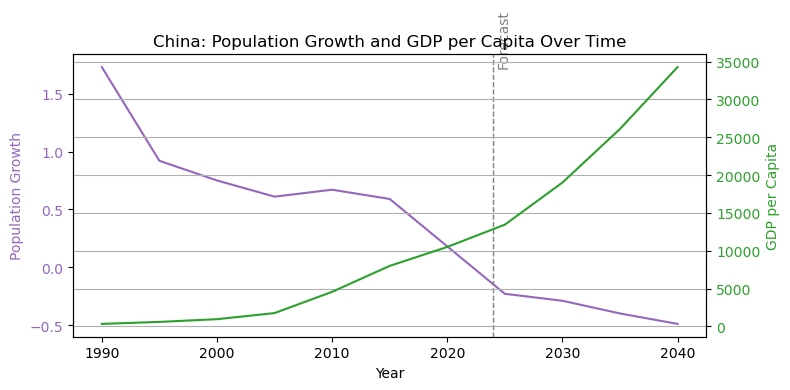

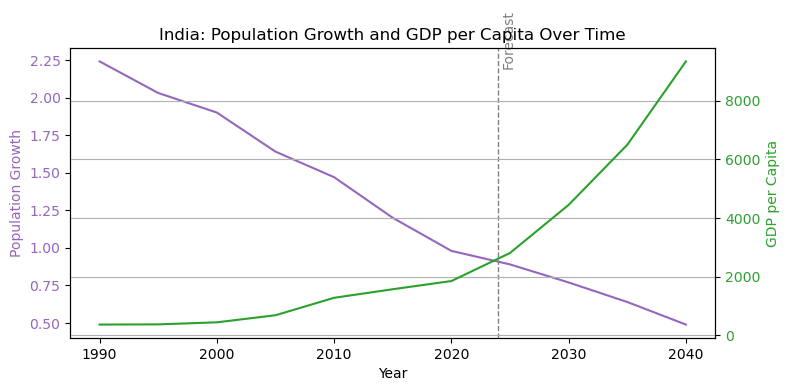

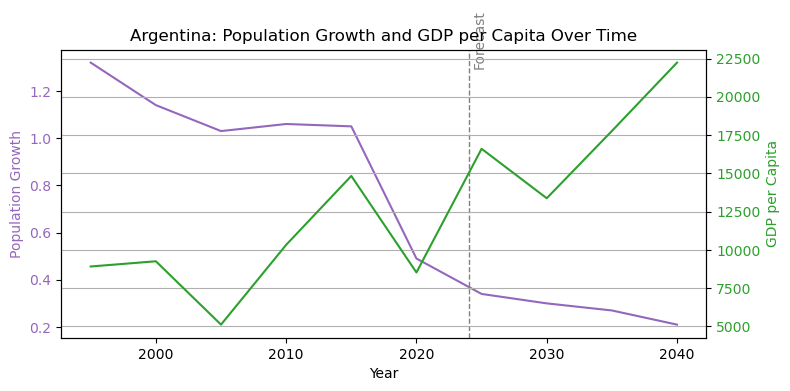

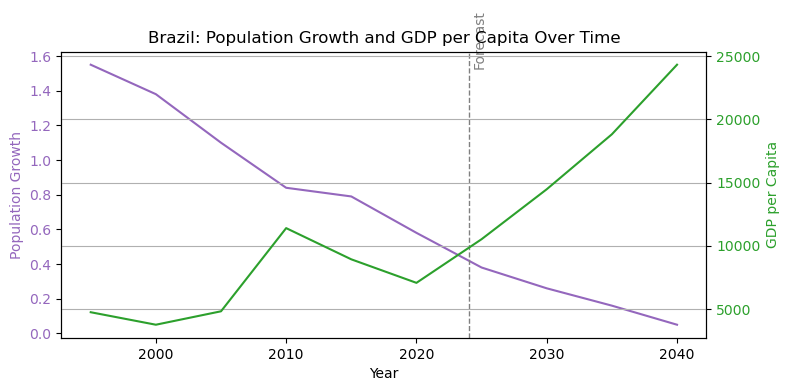

In [732]:
import matplotlib.pyplot as plt

# Get unique countries
countries = df_devp['Country'].unique()

# Loop through each country
for country in countries:
    data = df_devp[df_devp['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Investment Rate on left Y-axis
    ax1.plot(data['Year'], data['Population_growth'], color='tab:purple', label='Population Growth')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Population Growth', color='tab:purple')
    ax1.tick_params(axis='y', labelcolor='tab:purple')
    ax1.set_title(f"{country}: Population Growth and GDP per Capita Over Time")

    # Create second y-axis for GDP per capita
    ax2 = ax1.twinx()
    ax2.plot(data['Year'], data['GDP_per_capita'], color='tab:green', label='GDP per Capita')
    ax2.set_ylabel('GDP per Capita', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.axvline(x=2024, color='gray', linestyle='--', linewidth=1)
    ax1.text(2024 + 0.3, ax1.get_ylim()[1]*0.95, 'Forecast', rotation=90, color='gray')

    fig.tight_layout()
    plt.grid(True)
    plt.show()

In [987]:
#per country group machine learning pipeline
groups = {
    "Developed": ["United States", "Australia", "Netherlands", "United Kingdom"],
    "Late_Industrializers": ["Japan", "Singapore"],
    "Developing": [ "India","Argentina", "Brazil"]
}
feature_cols = ["Population_growth", "Avg_years_schooling", "Investment_rate"]
models = {}
scalers = {}

for group_name, countries in groups.items():
    print(f"\n=== TRAINING: {group_name.upper()} ===")

    df_group = df_clean[df_clean['Country'].isin(countries)]
    df_group = df_group[df_group['Year'] <= 2024]
    df_group = df_group.dropna(subset=feature_cols + ["log_GDP_per_capita"])

    X = df_group[feature_cols]
    y = df_group["log_GDP_per_capita"]

    X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = MinMaxScaler()
    X_train_scaled_bc = scaler.fit_transform(X_train_bc)
    X_test_scaled_bc = scaler.transform(X_test_bc)

    model = LinearRegression()
    model.fit(X_train_scaled_bc, y_train_bc)

    # Store model and scaler
    models[group_name] = model
    scalers[group_name] = scaler

    # Evaluation (optional here)
    y_pred_bc = model.predict(X_test_scaled_bc)
    print(f"R²: {r2_score(y_test_bc, y_pred_bc):.3f} | MAE: {mean_absolute_error(y_test_bc, y_pred_bc):.3f} | RMSE: {mean_squared_error(y_test_bc, y_pred_bc, squared=False):.3f}")

    coef=model.coef_
    intercept=model.intercept_
    print("Coefficients:")
    for feature_1, value in zip(feature_cols, model.coef_):
        print(f"  {feature_1}: {value:.4f}")
    print(f"Intercept: {intercept:.4f}")



=== TRAINING: DEVELOPED ===
R²: 0.726 | MAE: 0.143 | RMSE: 0.193
Coefficients:
  Population_growth: -0.1930
  Avg_years_schooling: 0.8991
  Investment_rate: -0.0835
Intercept: 10.0921

=== TRAINING: LATE_INDUSTRIALIZERS ===
R²: -0.170 | MAE: 0.065 | RMSE: 0.081
Coefficients:
  Population_growth: 0.3178
  Avg_years_schooling: 1.2890
  Investment_rate: -0.1984
Intercept: 9.6071

=== TRAINING: DEVELOPING ===
R²: 0.626 | MAE: 0.349 | RMSE: 0.413
Coefficients:
  Population_growth: -1.7537
  Avg_years_schooling: 1.3465
  Investment_rate: -1.3750
Intercept: 8.5106


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [738]:
df_future=df_clean[df_clean['Year']>2024]
df_future

Country  Year      GDPR  GDP_per_capita  Population_growth  \
7846     Canada  2025  0.769895    52766.571126               0.97   
7847     Mexico  2025 -0.931524    12781.783166               0.83   
7848     Mexico  2025 -0.931524    12781.783166               0.83   
7849     Mexico  2025 -0.931524    12781.783166               0.83   
7850     Mexico  2025 -0.931524    12781.783166               0.83   
...         ...   ...       ...             ...                ...   
11541    Zambia  2040  4.001317     1920.996068               2.12   
11546     India  2040  4.718458     9342.222648               0.49   
11547  Pakistan  2040  3.974433     3038.242867               1.51   
11548     Egypt  2040  3.494177    10337.533598               1.27   
11549      Iran  2040  1.958223    19990.827252               0.34   

       Avg_years_schooling  Investment_rate  log_GDP_per_capita  
7846                 12.98        22.831322           10.873633  
7847                 10.64        24.008734            9.455776  
7848                 10.64        24.008734            9.455776  
7849                 10.64        24.008734            9.455776  
7850                 10.64        24.008734            9.455776  
...                    ...              ...                 ...  
11541                 9.63        43.785649            7.560599  
11546                10.03        29.965204            9.142299  
11547                 8.14        10.846079            8.019035  
11548                10.45        13.612753            9.243537  
11549                11.88        23.498548            9.903029  

[416 rows x 8 columns]

In [748]:
X_prediction=df_future[X_train_1.columns]

#X_prediction must be scaled as well
X_prediction_scaled=scaler.transform(X_prediction)
X_prediction_scaled

array([[ 0.27428571,  1.48673947,  0.3678447 ],
       [ 0.19428571,  1.12168487,  0.41930575],
       [ 0.19428571,  1.12168487,  0.41930575],
       ...,
       [ 0.58285714,  0.73166927, -0.15599334],
       [ 0.44571429,  1.09204368, -0.03507053],
       [-0.08571429,  1.31513261,  0.39700712]])

In [778]:
predicted_gdp_pc=lin_reg_2.predict(X_prediction_scaled)
predicted_gdp_pc

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.21067915, 10.29210242, 10.29210242, 10.29210242, 10.29210242,
        9.13132922, 10.38554147, 11.90985851, 10.65684061,  9.80974306,
       10.66489589, 10.93057371,  9.22405399, 12.85808164,  9.984701  ,
       11.09183864, 11.24022912, 10.99166985, 11.39200333,  8.70909603,
       10.13293926, 10.93167183, 11.80197654, 11.8042367 ,  8.68274347,
       11.62803205, 11.0349653 , 12.57648359,  8.63725525,  8.83921892,
       10.04202636,  9.40174602, 10.08564265,  9.57725578,  9.88287618,
        9.41378782,  9.47592318,  9.64383475, 11.23911297, 10.4556403 ,
        8.29230602, 12.17567624,  8.5496307 ,  9.59323293, 10.69089382,
       11.93553391, 10.15047844,  9.5724895 , 12.22462061,  9.96099824,
       10.86528846,  8.86518363,  9.27198156,  8.76215559, 10.93881128,
        9.90424047,  7.93978849, 10.19115417, 10.29519797,  8.83588936,
        9.36151679,  8.17040098,  7.9055352 ,  9.11414557,  9.1011803 ,
       10.29210242, 10.29210242, 10.29210242, 10.29210242,  8.95

In [752]:
actual_gdp_pc_future= df_future["log_GDP_per_capita"]
actual_gdp_pc_future

7846     10.873633
7847      9.455776
7848      9.455776
7849      9.455776
7850      9.455776
           ...    
11541     7.560599
11546     9.142299
11547     8.019035
11548     9.243537
11549     9.903029
Name: log_GDP_per_capita, Length: 416, dtype: float64

In [786]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_future = mean_absolute_error(actual_gdp_pc_future, predicted_gdp_pc)
rmse_future = mean_squared_error(actual_gdp_pc_future, predicted_gdp_pc, squared=False)
r2_future = r2_score(actual_gdp_pc_future, predicted_gdp_pc)

print("Post-2024 Prediction Accuracy:")
print(f"MAE: {mae_future:.3f}")
print(f"RMSE: {rmse_future:.3f}")
print(f"R² Score: {r2_future:.3f}")

Post-2024 Prediction Accuracy:
MAE: 1.057
RMSE: 1.313
R² Score: -0.144


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [780]:
print(df_actual['GDPR'].describe())
print(df_actual['GDPR'].isna().sum())


count    661.000000
mean       2.403112
std        5.382316
min      -26.228893
25%        0.800001
50%        3.134047
75%        5.192229
max       37.228067
Name: GDPR, dtype: float64
0


In [800]:
for group_name, countries in groups.items():
    print(f"\n=== PREDICTING: {group_name.upper()} ===")

    df_group = df_clean[df_clean['Country'].isin(countries)]
    df_group = df_group[df_group['Year'] > 2024]
    df_group = df_group.dropna(subset=feature_cols + ["log_GDP_per_capita"])

    if df_group.empty:
        print("  No future data available.")
        continue

    X_future = df_group[feature_cols]
    y_future = df_group["log_GDP_per_capita"]

    # Use the model and scaler trained for this group
    model = models[group_name]
    scaler = scalers[group_name]

    X_future_scaled = scaler.transform(X_future)
    y_pred_future = model.predict(X_future_scaled)

    r2 = r2_score(y_future, y_pred_future)
    mae = mean_absolute_error(y_future, y_pred_future)
    rmse = mean_squared_error(y_future, y_pred_future, squared=False)

    print(f"R² (future): {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}")
    coef=model.coef_
    intercept=model.intercept_
    print("Coefficients:")
    for X_future, value in zip(feature_cols, model.coef_):
        print(f"  {feature_1}: {value:.4f}")
    print(f"Intercept: {intercept:.4f}")



=== PREDICTING: DEVELOPED ===
R² (future): -4.788 | MAE: 0.489 | RMSE: 0.572
Coefficients:
  Investment_rate: -0.1930
  Investment_rate: 0.8991
  Investment_rate: -0.0835
Intercept: 10.0921

=== PREDICTING: LATE_INDUSTRIALIZERS ===
R² (future): 0.525 | MAE: 0.284 | RMSE: 0.309
Coefficients:
  Investment_rate: 0.3178
  Investment_rate: 1.2890
  Investment_rate: -0.1984
Intercept: 9.6071

=== PREDICTING: DEVELOPING ===
R² (future): 0.925 | MAE: 0.149 | RMSE: 0.175
Coefficients:
  Investment_rate: -1.7537
  Investment_rate: 1.3465
  Investment_rate: -1.3750
Intercept: 8.5106


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [806]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0)

In [810]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [812]:
normalizer = MinMaxScaler()

In [834]:
X_train_scaled = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [ ]:
X_train_scal = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scal.head()

In [816]:
knn= KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [818]:
knn.score(X_test_scaled, y_test)

0.5427637924868398

In [822]:
tree = DecisionTreeRegressor(max_depth=10)

In [826]:
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10)

In [828]:
pred_tree = tree.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_tree, y_test))
print("RMSE", mean_squared_error(pred_tree, y_test, squared=False))
print("R2 score", tree.score(X_test_scaled, y_test))

MAE 0.8186495165450867
RMSE 1.0932391156191543
R2 score 0.4741653342683112


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [836]:
tree_importance = {feature : importance for feature, importance in zip(X_train_scal.columns, tree.feature_importances_)}
tree_importance    

{'GDPR': 0.07449070800293028,
 'Population_growth': 0.22697916690160888,
 'Avg_years_schooling': 0.5826901716045266,
 'Investment_rate': 0.11583995349093412}

In [838]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_scal.columns))

In [840]:
!pip install graphviz

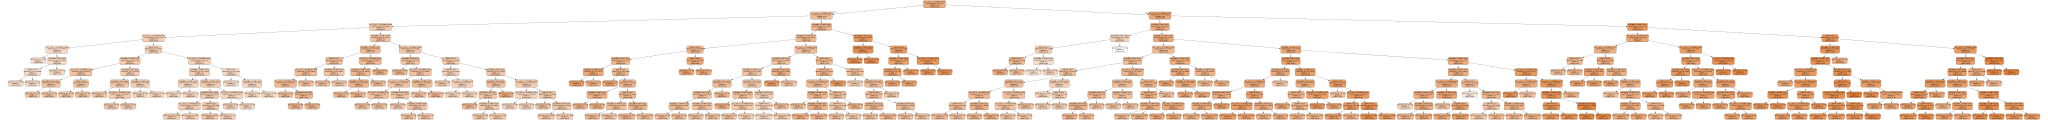

In [842]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None, 
                           filled=True, rounded=True,
                           feature_names=X_train.columns)
graphviz.Source(dot_data)


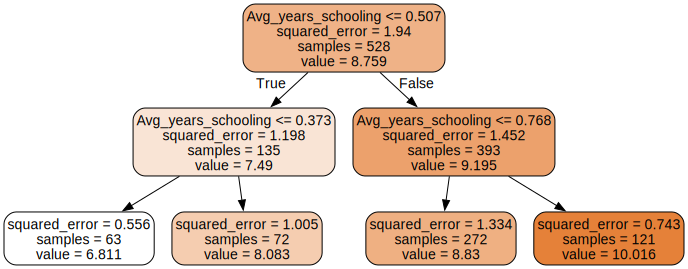

In [844]:
import graphviz


from sklearn.tree import DecisionTreeRegressor, export_graphviz


tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_scal, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_scal.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [848]:
#per country group machine learning pipeline
groups = {
    "Developed": ["United States", "Australia", "Netherlands", "United Kingdom"],
    "Late_Industrializers": ["Japan", "Singapore"],
    "Developing": [ "India","Argentina", "Brazil"]
}
feature_cols = ["Population_growth", "Avg_years_schooling", "Investment_rate"]
models = {}
scalers = {}

for group_name, countries in groups.items():
    print(f"\n=== TRAINING: {group_name.upper()} ===")

    df_group = df_clean[df_clean['Country'].isin(countries)]
    df_group = df_group[df_group['Year'] <= 2024]
    df_group = df_group.dropna(subset=feature_cols + ["log_GDP_per_capita"])

    X = df_group[feature_cols]
    y = df_group["log_GDP_per_capita"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn= KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train_scaled, y_train)
    score=knn.score(X_test_scaled, y_test)

    print(f"knn:{score}")

    # Store model and scaler
    models[group_name] = model
    scalers[group_name] = scaler

    # Evaluation (optional here)
    y_pred = model.predict(X_test_scaled)
    print(f"R²: {r2_score(y_test, y_pred):.3f} | MAE: {mean_absolute_error(y_test, y_pred):.3f} | RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

    coef=model.coef_
    intercept=model.intercept_
    print("Coefficients:")
    for feature_1, value in zip(feature_cols, model.coef_):
        print(f"  {feature_1}: {value:.4f}")
    print(f"Intercept: {intercept:.4f}")



=== TRAINING: DEVELOPED ===
knn:0.7236138742571188
R²: -61.484 | MAE: 2.790 | RMSE: 2.916
Coefficients:
  Population_growth: -1.7537
  Avg_years_schooling: 1.3465
  Investment_rate: -1.3750
Intercept: 8.5106

=== TRAINING: LATE_INDUSTRIALIZERS ===
knn:0.0911837711581246
R²: -670.793 | MAE: 1.923 | RMSE: 1.942
Coefficients:
  Population_growth: -1.7537
  Avg_years_schooling: 1.3465
  Investment_rate: -1.3750
Intercept: 8.5106

=== TRAINING: DEVELOPING ===
knn:0.4917747209212483
R²: 0.626 | MAE: 0.349 | RMSE: 0.413
Coefficients:
  Population_growth: -1.7537
  Avg_years_schooling: 1.3465
  Investment_rate: -1.3750
Intercept: 8.5106


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [852]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for group_name, countries in groups.items():
    print(f"\n=== TRAINING: {group_name.upper()} ===")

    df_group = df_clean[df_clean['Country'].isin(countries)]
    df_group = df_group[df_group['Year'] <= 2024]
    df_group = df_group.dropna(subset=feature_cols + ["log_GDP_per_capita"])

    X = df_group[feature_cols]
    y = df_group["log_GDP_per_capita"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X_train_scaled, y_train)
    pred_tree = tree.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, pred_tree)
    rmse = mean_squared_error(y_test, pred_tree, squared=False)
    r2 = r2_score(y_test, pred_tree)

    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")



=== TRAINING: DEVELOPED ===
MAE: 0.135
RMSE: 0.208
R² Score: 0.683

=== TRAINING: LATE_INDUSTRIALIZERS ===
MAE: 0.276
RMSE: 0.289
R² Score: -13.863

=== TRAINING: DEVELOPING ===
MAE: 0.510
RMSE: 0.575
R² Score: 0.277


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [971]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # use 'estimator' not 'base_estimator'
    n_estimators=10,
    random_state=0
)

bagging_reg.fit(X_train_scal_1, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0)

In [973]:
pred_bagging_all = bagging_reg.predict(X_test_scal_1)

print("MAE", mean_absolute_error(pred_bagging_all, y_test))
print("RMSE", mean_squared_error(pred_bagging_all, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_scal_1, y_test))

MAE 0.6753453675086089
RMSE 0.9476596706654105
R2 score 0.5745492830070864


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [977]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [979]:
forest.fit(X_train_scal_1, y_train)

RandomForestRegressor(max_depth=20)

In [981]:
pred_forest_all = forest.predict(X_test_scal_1)

print("MAE", mean_absolute_error(pred_forest_all,y_test))
print("RMSE", mean_squared_error(pred_forest_all, y_test, squared=False))
print("R2 score", forest.score(X_test_scal_1, y_test))

MAE 0.6667778855725097
RMSE 0.8948762209447445
R2 score 0.6206235239647904


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [901]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [967]:
gb_reg.fit(X_train_scal_1, y_train)

GradientBoostingRegressor(max_depth=20)

In [969]:
pred_gra_all = gb_reg.predict(X_test_scal_1)

print("MAE", mean_absolute_error(pred_gra_all, y_test))
print("RMSE", mean_squared_error(pred_gra_all, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_scal_1, y_test))

MAE 0.7715272880849068
RMSE 1.1110311629864493
R2 score 0.41521403189074824


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [909]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [983]:
ada_reg.fit(X_train_scal_1, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [985]:
pred_ada_all = ada_reg.predict(X_test_scal_1)

print("MAE", mean_absolute_error(pred_ada_all, y_test))
print("RMSE", mean_squared_error(pred_ada_all, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_scal_1, y_test))

MAE 0.6671919512968837
RMSE 0.903062525372655
R2 score 0.6136507233821312


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [989]:
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor,
    GradientBoostingRegressor, AdaBoostRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

groups = {
    "Developed": ["United States", "Australia", "Netherlands", "United Kingdom"],
    "Late_Industrializers": ["Japan", "Singapore"],
    "Developing": ["India", "Argentina", "Brazil"]
}

feature_cols = ["Population_growth", "Avg_years_schooling", "Investment_rate"]

for group_name, countries in groups.items():
    print(f"\n=== ENSEMBLE TRAINING: {group_name.upper()} ===")

    df_group = df_clean[df_clean['Country'].isin(countries)]
    df_group = df_group[df_group['Year'] <= 2024]
    df_group = df_group.dropna(subset=feature_cols + ["log_GDP_per_capita"])

    X = df_group[feature_cols]
    y = df_group["log_GDP_per_capita"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ensemble_models = {
        "Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=0),
        "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=0),
        "AdaBoost": AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=0)
    }

    for model_name, model in ensemble_models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"{model_name} → R²: {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}")



=== ENSEMBLE TRAINING: DEVELOPED ===
Bagging → R²: 0.770 | MAE: 0.164 | RMSE: 0.177
RandomForest → R²: 0.779 | MAE: 0.159 | RMSE: 0.173
GradientBoosting → R²: 0.719 | MAE: 0.132 | RMSE: 0.195


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

AdaBoost → R²: 0.774 | MAE: 0.128 | RMSE: 0.176

=== ENSEMBLE TRAINING: LATE_INDUSTRIALIZERS ===
Bagging → R²: -1.240 | MAE: 0.094 | RMSE: 0.112
RandomForest → R²: -1.647 | MAE: 0.107 | RMSE: 0.122
GradientBoosting → R²: -5.314 | MAE: 0.152 | RMSE: 0.188
AdaBoost → R²: -1.304 | MAE: 0.098 | RMSE: 0.114

=== ENSEMBLE TRAINING: DEVELOPING ===
Bagging → R²: 0.783 | MAE: 0.231 | RMSE: 0.315
RandomForest → R²: 0.725 | MAE: 0.264 | RMSE: 0.355
GradientBoosting → R²: 0.448 | MAE: 0.456 | RMSE: 0.503
AdaBoost → R²: 0.653 | MAE: 0.352 | RMSE: 0.398


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [991]:
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor,
    GradientBoostingRegressor, AdaBoostRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
feature_cols = ["Population_growth", "Avg_years_schooling", "Investment_rate"]
target_col = "log_GDP_per_capita"

# Filter and clean the data
df_all = df_clean[df_clean['Year'] <= 2024]
df_all = df_all.dropna(subset=feature_cols + [target_col])

X = df_all[feature_cols]
y = df_all[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define ensemble models
ensemble_models = {
    "LinearRegression": LinearRegression(),
    "Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=0),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=0),
    "AdaBoost": AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=0)
}

# Train and evaluate each model
print("=== ENSEMBLE MODELS: ALL COUNTRIES ===")
for model_name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} → R²: {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}")


=== ENSEMBLE MODELS: ALL COUNTRIES ===
LinearRegression → R²: 0.512 | MAE: 0.752 | RMSE: 1.015
Bagging → R²: 0.597 | MAE: 0.680 | RMSE: 0.922
RandomForest → R²: 0.631 | MAE: 0.665 | RMSE: 0.883


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoosting → R²: 0.563 | MAE: 0.679 | RMSE: 0.960
AdaBoost → R²: 0.551 | MAE: 0.743 | RMSE: 0.973


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
